# Trabalho 6: a ser entregue antes da AV2


## 1. Resolva 'na mão' pelo método spline cúbica. 
Grafique o polinômio encontrado e determine o valor para x = 2,5.

| X   | F(X) |
| --- | ---- |
| 1,5 | 1    |
| 1,9 | 4    |
| 3,1 | 9    |
| 4   | 16   |






S(2)(2.5) = 6.625000000000001


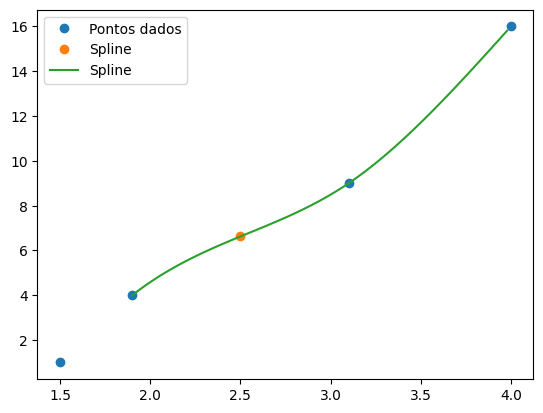

In [14]:
# Definindo os pontos dados
x = [1.5, 1.9, 3.1, 4.0]
y = [1.0, 4.0, 9.0, 16.0]

# Número de splines
n = len(x) - 1  # Número de intervalos

# Inicializando os coeficientes das splines
a = y[:-1]
b = [0] * n
c = [0] * (n + 1)
d = [0] * n
h = [0] * n
alpha = [0] * n

for i in range(n):
	h[i] = x[i+1] - x[i]
	if i > 0:
		alpha[i] = 3/h[i] * (y[i+1] - y[i]) - 3/h[i-1] * (y[i] - y[i-1])

l = [1] * (n + 1)
mu = [0] * (n + 1)
z = [0] * (n + 1)

for i in range(1, n):
	l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
	mu[i] = h[i] / l[i]
	z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Condição de contorno natural estabelece que c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Resolvendo o sistema para encontrar 'c', 'b' e 'd'
for j in range(n-1, -1, -1):
	c[j] = z[j] - mu[j] * c[j+1]
	b[j] = (y[j+1] - y[j])/h[j] - h[j] * (c[j+1] + 2 * c[j])/3
	d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Função de spline
def S(k, x_val):
	return a[k] + b[k]*(x_val - x[k]) + c[k]*(x_val - x[k])**2 + d[k]*(x_val - x[k])**3

# Encontrando o valor da spline em x = 2.5
x_val = 2.5
s_val = None
for i in range(n):
	if x[i] <= x_val < x[i+1]:
		s_val = S(i, x_val)
		print(f"S({i+1})({x_val}) = {s_val}")
		break

# Plotando os pontos e a spline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, y, 'o', label='Pontos dados')
plt.plot(x_val, s_val, 'o', label='Spline')
x_spline = np.linspace(x[1], x[-1], 100)

s_val = []
for x_val in x_spline:
	for i in range(n):
		if x[i] <= x_val < x[i+1]:
			s_val.append(S(i, x_val))
			break
plt.plot(x_spline[:99], s_val, label='Spline')
plt.legend()
plt.show()


## 2. Você realiza um test-drive em um automóvel em que você alternadamente acelera o veículo e depois o mantém em uma velocidade constante. 
Observe que você nunca desacelera durante o experimento. A série temporal de medições pontuais de velocidade pode ser tabulada como:

| t   | v   |
| --- | --- |
| 0   | 0   |
| 20  | 20  |
| 40  | 20  |
| 56  | 38  |
| 68  | 80  |
| 80  | 80  |
| 84  | 100 |
| 96  | 100 |
| 104 | 125 |
| 110 | 125 |

Use a função `interpol1` do Matlab para ajustar esses dados com:
(a) interpolação linear, 
(b) nearest, 
(c) spline e 
(d) pchip.

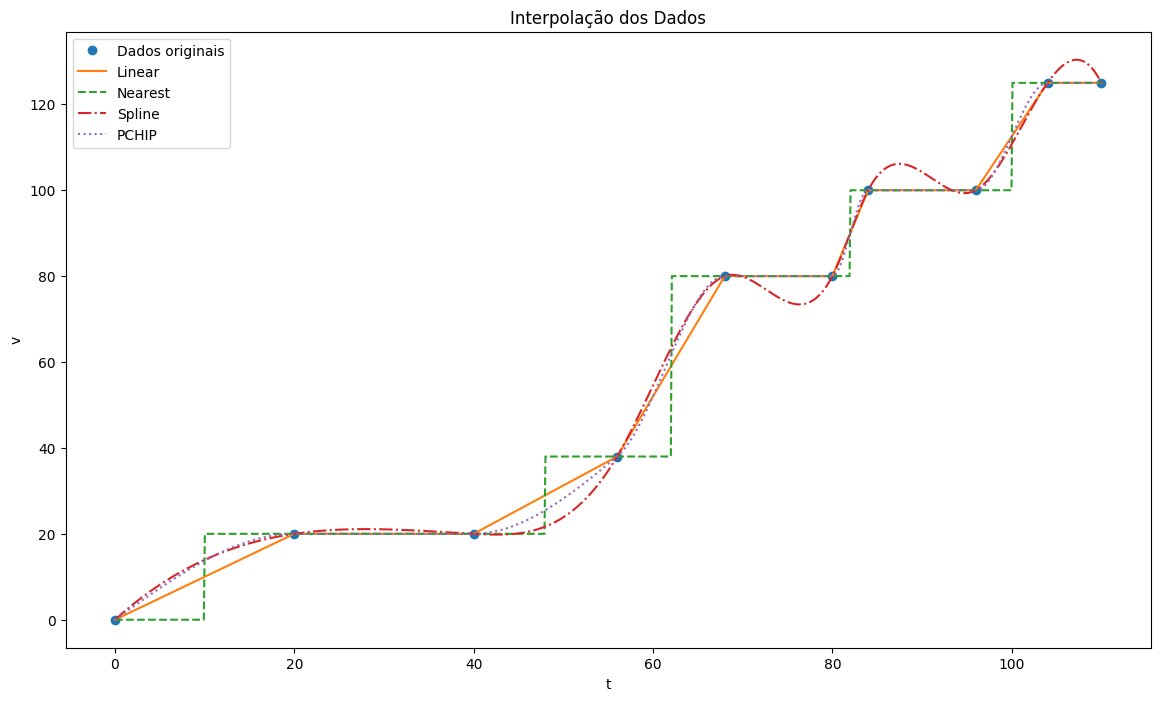

In [2]:
from scipy.interpolate import interp1d, PchipInterpolator
import numpy as np

# Dados
t_values = np.array([0, 20, 40, 56, 68, 80, 84, 96, 104, 110])
v_values = np.array([0, 20, 20, 38, 80, 80, 100, 100, 125, 125])

# Cria pontos onde você quer interpolar
t_new = np.linspace(t_values.min(), t_values.max(), num=1000)

# (a) Interpolação Linear
linear_interpolator = interp1d(t_values, v_values)
v_linear = linear_interpolator(t_new)

# (b) Nearest
nearest_interpolator = interp1d(t_values, v_values, kind='nearest')
v_nearest = nearest_interpolator(t_new)

# (c) Spline
spline_interpolator = interp1d(t_values, v_values, kind='cubic')
v_spline = spline_interpolator(t_new)

# (d) PCHIP (Piecewise Cubic Hermite Interpolating Polynomial)
pchip_interpolator = PchipInterpolator(t_values, v_values)
v_pchip = pchip_interpolator(t_new)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(t_values, v_values, 'o', label='Dados originais')

plt.plot(t_new, v_linear, '-', label='Linear')
plt.plot(t_new, v_nearest, '--', label='Nearest')
plt.plot(t_new, v_spline, '-.', label='Spline')
plt.plot(t_new, v_pchip, ':', label='PCHIP')

plt.legend()
plt.xlabel('t')
plt.ylabel('v')
plt.title('Interpolação dos Dados')
plt.show()
